In [20]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
path_to_save = "C:\\Users\\" *username *  "\\Desktop\\IJCNN\\"

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


"C:\\Users\\Alex\\Desktop\\IJCNN\\"

In [21]:
using DynamicalSystems, DifferentialEquations

using Statistics
using StaticArrays
using CairoMakie
using JLD

In [22]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end
Hs(x, k) = Statistics.mean(x) + k * Statistics.std(x)

Hs (generic function with 1 method)

In [23]:
function peaks(x)
    peaks_ = Float64[]
    len_ = length(x)
    for i in range(2, len_ - 1, step = 1)
        if x[i-1] < x[i] > x[i+1]
            push!(peaks_, x[i])
            end
        end
    return peaks_
end
function CALCPDF(spikes)
    ϵ = 0.9
    ee_counter = [sum(i->s<=i<s+ϵ, spikes) for s in range(0,4,500000)]
    pdf = ee_counter ./ length(spikes)
    return range(0,4,500000), pdf
end

peaks (generic function with 1 method)

In [25]:
tspan = (0., 500000.)

a = 1.
b = 3.
c = 1.
d = 5.
xr = -1.6
r = 0.01
s = 5.
I = 4.
xv = 2.

k1= 0.07
k2 = k1

0.07

In [26]:
condition_chaos = SA[    -1.3708880285256102
 -8.022011143224757
  4.3093369397057115
 -0.7483763647564559
 -1.8529391589460256
  4.142716799658893]

6-element SVector{6, Float64} with indices SOneTo(6):
 -1.3708880285256102
 -8.022011143224757
  4.3093369397057115
 -0.7483763647564559
 -1.8529391589460256
  4.142716799658893

In [27]:
k = 0.001
p = SA[a, b, c, d, s, xr, r, I, xv, k1, k2, k]

12-element SVector{12, Float64} with indices SOneTo(12):
  1.0
  3.0
  1.0
  5.0
  5.0
 -1.6
  0.01
  4.0
  2.0
  0.07
  0.07
  0.001

In [28]:
prob = ODEProblem(HR, condition_chaos, tspan, p)

ODEProblem with uType SVector{6, Float64} and tType Float64. In-place: false
timespan: (0.0, 500000.0)
u0: 6-element SVector{6, Float64} with indices SOneTo(6):
 -1.3708880285256102
 -8.022011143224757
  4.3093369397057115
 -0.7483763647564559
 -1.8529391589460256
  4.142716799658893

In [29]:
sol = solve(prob, AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11, maxiters = 10000000);

In [30]:
xsum = sol[1, :] + sol[4, :];
println("before: ", length(xsum))

xsum = xsum[floor(Int, length(xsum) / 4):end ]
println("after: ", length(xsum))

before: 6138490
after: 4603869

In [31]:
Hs1 = Hs(xsum, 6)

3.399021318333863

In [ ]:
f = Figure(resolution = (2000, 1000))

ax = Axis(f[1, 1], xlabel = L"time", ylabel = L"x_{||}",
xlabelsize = 120, ylabelsize = 140,
                xticklabelsize = 85, yticklabelsize = 85)
                
ax.xgridvisible = false
ax.ygridvisible = false

lines!(ax, sol.t[206500:210000], xsum[206500:210000], linewidth = 3.0, color = "black")

# hlines!(Hs2, color = "red", linewidth = 1.0, linestyle = :dash)
hlines!(Hs1, color = "red", linewidth = 4.0)


save("timesrieshyperchaos_positive.eps", f)
f

In [41]:
sel_1, pdf_1 = CALCPDF(xsum)

(0.0:8.000016000032e-6:4.0, [0.05909616455203221, 0.0590959473434192, 0.059095078508967135, 0.059095078508967135, 0.0590959473434192, 0.05909573013480618, 0.05909573013480618, 0.05909573013480618, 0.05909573013480618, 0.0590959473434192  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [32]:
cd("C:\\Users\\Alex\\YandexDisk\\Science\\HR\\PDF")

sel_1 = load("sel_1_hyperch_positive.jld")["data"]
pdf_1 = load("pdf_1_hyperch_positive.jld")["data"];

In [33]:
EE_mapcopy = pdf_1;
EE_mapcopy = [ iszero(x) ? missing : x for x in EE_mapcopy ];

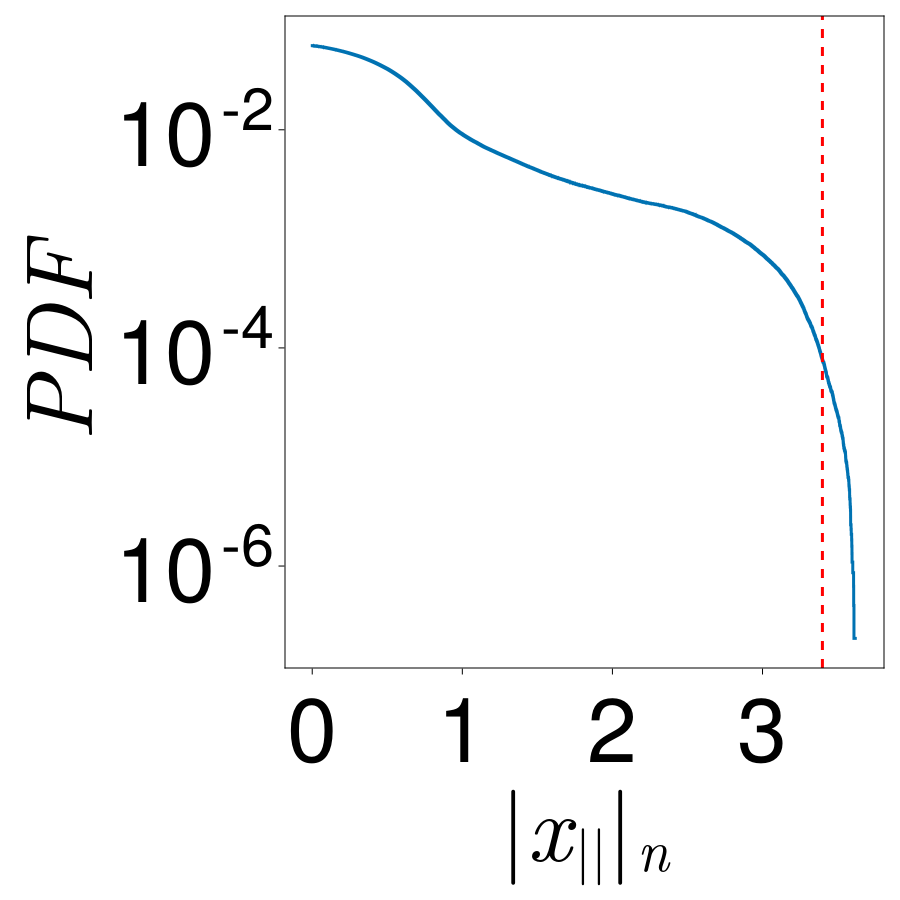

In [37]:
f = Figure(resolution = (900, 900))
ax = Axis(f[1, 1], yscale = log10,
xlabel = L"|x_{||}|_{n}", ylabel = L"PDF",
xlabelsize = 95, ylabelsize = 95,
                xticklabelsize = 90, yticklabelsize = 90)
ax.xgridvisible = false
ax.ygridvisible = false

lines!(sel_1, EE_mapcopy, linewidth = 3.0)
vlines!(ax, Hs1, color = "red", linestyle = :dash, linewidth = 3.0)
#save("PDF_hyperchaos_positive.eps", f)
f

In [34]:
labelsize = 50
ticksize = 40

40

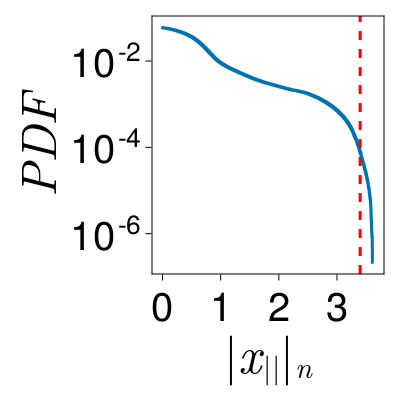

In [42]:
f = Figure(resolution = (400, 400))
ax = Axis(f[1, 1], yscale = log10,
xlabel = L"|x_{||}|_{n}", ylabel = L"PDF",
xlabelsize = labelsize, ylabelsize = labelsize,
                xticklabelsize = ticksize, yticklabelsize = ticksize)
ax.xgridvisible = false
ax.ygridvisible = false

lines!(sel_1, EE_mapcopy, linewidth = 3.0)
vlines!(ax, Hs1, color = "red", linestyle = :dash, linewidth = 3.0)

cd(path_to_save)
filename = "PDF_hyperchaos_positive.pdf"
save(filename, f)
f

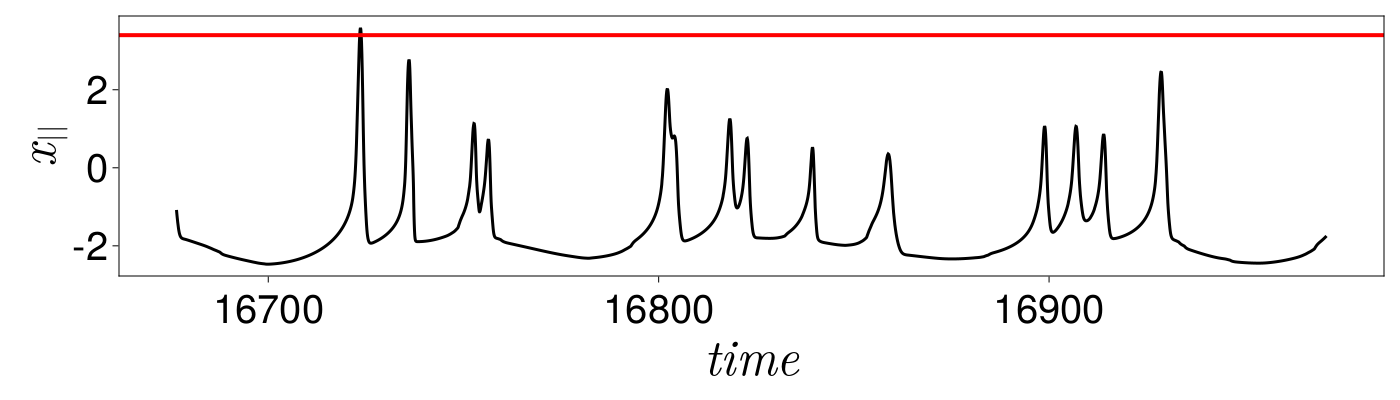

In [43]:
f = Figure(resolution = (1400, 400))

ax = Axis(f[1, 1], xlabel = L"time", ylabel = L"x_{||}",
            xlabelsize = labelsize, ylabelsize = labelsize,
            xticklabelsize = ticksize, yticklabelsize = ticksize)
                
ax.xgridvisible = false
ax.ygridvisible = false

lines!(ax, sol.t[206500:210000], xsum[206500:210000], linewidth = 3.0, color = "black")
hlines!(Hs1, color = "red", linewidth = 4.0)

cd(path_to_save)
filename = "timesrieshyperchaos_positive.pdf"
save(filename, f)
f